Using cuda device


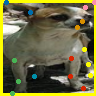

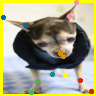

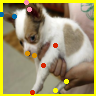

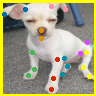

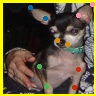

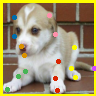

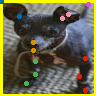

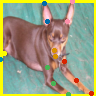

In [7]:
import sys;sys.path.insert(0, '..')
from matplotlib import colormaps
import torch
import torch.nn as nn
import os
from src.FCN8 import FCN8
import src.core as core
import src.guassian as guassian
import torchvision
import matplotlib.pyplot as plt
from src.image import add_bbox_and_keypoints, add_keypoints
from src.keypoints import get_keypoint_definitions

cm = colormaps['inferno']
cwd = os.getcwd()
FCN8_model_dir = os.path.join(cwd, '..', 'models', 'FNC8_New_Split')

run_dir = os.path.join(FCN8_model_dir, 'run')
model_dir = os.path.join(FCN8_model_dir, 'model')


print(f"Using {core.TorchDevice} device")
torch.set_default_device(core.TorchDevice)

loaded_model = FCN8()
saved_model_path = model_path = os.path.join(model_dir, f'model_20240331_140924_11')
checkpoint = torch.load(saved_model_path)
loaded_model.load_state_dict(checkpoint)
loaded_model.eval()

image_index = 8

samples = []
for i, sample in enumerate(core.TestDataSetNoNormalization):
    if (i < image_index):
        samples.append(sample)
    
    if (i == image_index):
        break

keypoint_defs = get_keypoint_definitions('../data/annotations/keypoint_definitions.csv')

keypoint_colors = keypoint_defs['colors']

for sample in samples:
    sample_image_with_bbox = add_bbox_and_keypoints(sample['image'], sample['img_bbox'], sample['joints'], keypoint_colors)

    display(torchvision.transforms.functional.to_pil_image(sample_image_with_bbox))

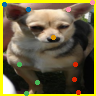

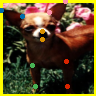

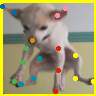

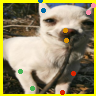

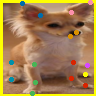

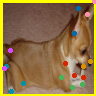

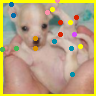

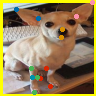

In [8]:
train_samples = []
for i, sample in enumerate(core.TrainDataSetNoNormalization):
    if (i < image_index):
        train_samples.append(sample)
    
    if (i == image_index):
        break

keypoint_defs = get_keypoint_definitions('../data/annotations/keypoint_definitions.csv')

keypoint_colors = keypoint_defs['colors']

for sample in train_samples:
    sample_image_with_bbox = add_bbox_and_keypoints(sample['image'], sample['img_bbox'], sample['joints'], keypoint_colors)

    display(torchvision.transforms.functional.to_pil_image(sample_image_with_bbox))

{'image': tensor([[[117, 151, 188,  ..., 136, 205, 142],
         [143, 114, 147,  ..., 124, 184,  87],
         [151, 150, 111,  ..., 143, 184,  90],
         ...,
         [ 57,  78, 157,  ...,  29,  27,  20],
         [ 43, 108, 190,  ...,  40,  34,  26],
         [ 56,  78, 119,  ...,  20,  16,  11]],

        [[118, 150, 188,  ..., 144, 210, 155],
         [142, 114, 150,  ..., 132, 187,  93],
         [147, 150, 114,  ..., 152, 186,  89],
         ...,
         [137, 146, 159,  ..., 118, 124, 123],
         [136, 148, 170,  ..., 133, 133, 130],
         [142, 155, 154,  ..., 127, 125, 123]],

        [[100, 131, 166,  ..., 103, 138,  96],
         [124,  94, 127,  ...,  86, 126,  61],
         [130, 132,  94,  ..., 108, 141,  82],
         ...,
         [230, 220, 204,  ..., 236, 241, 242],
         [241, 227, 204,  ..., 247, 247, 246],
         [242, 239, 213,  ..., 246, 246, 245]]], dtype=torch.uint8), 'img_bbox': [0.0, 0.0, 96.0, 96.0], 'joints': [[19.448275862068964, 92.93403

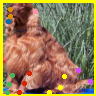

{'image': tensor([[[170, 168, 166,  ...,  18,  17,  16],
         [169, 168, 168,  ...,  22,  22,  22],
         [168, 168, 168,  ...,  24,  21,  23],
         ...,
         [207, 206, 206,  ..., 175, 177, 177],
         [207, 207, 204,  ..., 177, 175, 178],
         [209, 205, 208,  ..., 179, 180, 179]],

        [[106, 104, 102,  ...,  18,  17,  16],
         [105, 104, 104,  ...,  22,  23,  22],
         [104, 104, 104,  ...,  20,  17,  19],
         ...,
         [181, 181, 183,  ..., 142, 143, 144],
         [178, 180, 180,  ..., 144, 142, 145],
         [179, 177, 182,  ..., 145, 147, 146]],

        [[ 58,  56,  54,  ...,  16,  15,  14],
         [ 57,  56,  56,  ...,  17,  18,  18],
         [ 56,  56,  56,  ...,  13,  12,  16],
         ...,
         [152, 151, 152,  ..., 100, 101, 103],
         [147, 149, 148,  ..., 103, 101, 104],
         [146, 144, 148,  ..., 107, 107, 105]]], dtype=torch.uint8), 'img_bbox': [0.0, 0.0, 95.99999999999999, 96.0], 'joints': [[34.749295774647

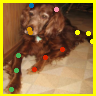

{'image': tensor([[[ 11,   2,   4,  ...,  84, 117, 120],
         [ 41,  12,   8,  ...,  92, 129, 111],
         [ 69,  63,  25,  ...,  79, 114, 111],
         ...,
         [ 92,  79, 120,  ..., 108, 119, 129],
         [ 97,  97,  76,  ..., 115, 118, 115],
         [ 71,  65,  70,  ..., 114, 131, 131]],

        [[ 20,   6,   6,  ..., 106, 134, 135],
         [ 54,  19,   9,  ..., 117, 153, 134],
         [ 88,  77,  33,  ..., 107, 143, 142],
         ...,
         [ 86,  66,  99,  ..., 107, 118, 128],
         [ 96,  91,  63,  ..., 114, 117, 114],
         [ 74,  64,  66,  ..., 113, 130, 130]],

        [[  6,   1,   5,  ...,  49,  79,  78],
         [ 33,   9,   7,  ...,  60,  96,  74],
         [ 61,  58,  21,  ...,  52,  85,  79],
         ...,
         [ 84,  58,  86,  ..., 112, 123, 133],
         [ 99,  88,  57,  ..., 119, 122, 119],
         [ 79,  66,  65,  ..., 118, 135, 135]]], dtype=torch.uint8), 'img_bbox': [0.0, 0.0, 96.0, 96.0], 'joints': [[37.97802197802198, 78.208, 1

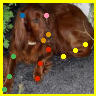

{'image': tensor([[[253, 253, 253,  ..., 130, 128, 127],
         [253, 253, 253,  ..., 130, 128, 127],
         [253, 253, 253,  ..., 133, 131, 128],
         ...,
         [236, 222, 227,  ..., 199, 203, 210],
         [233, 223, 223,  ..., 204, 219, 207],
         [224, 226, 219,  ..., 224, 233, 237]],

        [[253, 253, 253,  ..., 172, 170, 171],
         [253, 253, 253,  ..., 171, 169, 170],
         [253, 253, 253,  ..., 171, 170, 170],
         ...,
         [243, 230, 236,  ..., 210, 211, 220],
         [243, 233, 234,  ..., 215, 228, 217],
         [235, 237, 230,  ..., 236, 240, 245]],

        [[253, 253, 253,  ..., 152, 149, 147],
         [253, 253, 253,  ..., 152, 150, 147],
         [253, 253, 253,  ..., 154, 152, 149],
         ...,
         [192, 179, 185,  ..., 164, 167, 179],
         [187, 180, 181,  ..., 170, 185, 178],
         [172, 181, 179,  ..., 190, 198, 206]]], dtype=torch.uint8), 'img_bbox': [0.0, 0.0, 96.0, 96.0], 'joints': [[7.761702127659573, 88.184070

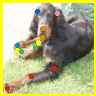

{'image': tensor([[[252, 251, 252,  ...,  93,  96, 110],
         [251, 252, 252,  ...,  83,  83,  92],
         [246, 249, 250,  ...,  72,  66,  76],
         ...,
         [ 63,  70,  67,  ..., 234, 231, 225],
         [ 54,  64,  50,  ..., 235, 232, 226],
         [ 42,  46,  35,  ..., 225, 221, 230]],

        [[246, 242, 236,  ..., 116, 109, 119],
         [243, 241, 234,  ..., 113, 109, 115],
         [235, 236, 229,  ..., 102,  98, 106],
         ...,
         [ 74,  77,  73,  ..., 176, 171, 164],
         [ 62,  73,  69,  ..., 177, 177, 172],
         [ 70,  74,  64,  ..., 169, 172, 182]],

        [[253, 250, 250,  ..., 129, 126, 136],
         [252, 252, 248,  ..., 124, 124, 129],
         [246, 247, 243,  ..., 111, 111, 117],
         ...,
         [ 62,  76,  76,  ..., 185, 178, 171],
         [ 57,  72,  57,  ..., 197, 188, 182],
         [ 55,  65,  59,  ..., 189, 185, 196]]], dtype=torch.uint8), 'img_bbox': [0.0, 0.0, 96.0, 96.00000000000001], 'joints': [[20.16, 91.10481

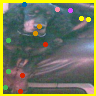

{'image': tensor([[[ 93,  92,  93,  ..., 123, 123, 124],
         [ 95,  95,  96,  ..., 125, 126, 125],
         [ 92,  94,  96,  ..., 123, 123, 124],
         ...,
         [ 48,  48,  47,  ..., 107, 107, 107],
         [ 48,  48,  48,  ..., 105, 106, 107],
         [ 48,  49,  48,  ..., 109, 109, 110]],

        [[ 57,  56,  57,  ...,  83,  83,  85],
         [ 59,  59,  60,  ...,  86,  87,  88],
         [ 56,  58,  60,  ...,  86,  86,  88],
         ...,
         [ 31,  31,  31,  ...,  73,  74,  74],
         [ 30,  30,  30,  ...,  74,  75,  77],
         [ 30,  31,  30,  ...,  78,  78,  79]],

        [[ 32,  31,  32,  ...,  47,  47,  49],
         [ 33,  33,  34,  ...,  48,  49,  51],
         [ 30,  32,  34,  ...,  50,  50,  53],
         ...,
         [ 19,  19,  18,  ...,  47,  47,  46],
         [ 20,  20,  20,  ...,  45,  45,  45],
         [ 20,  21,  20,  ...,  48,  48,  49]]], dtype=torch.uint8), 'img_bbox': [0.0, 0.0, 96.0, 95.99999999999999], 'joints': [[64.745341614906

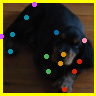

{'image': tensor([[[189, 188, 189,  ..., 211, 216, 211],
         [192, 191, 189,  ..., 204, 207, 208],
         [195, 194, 193,  ..., 205, 207, 206],
         ...,
         [ 73,  70,  72,  ...,  76,  75,  74],
         [ 74,  70,  65,  ...,  71,  71,  72],
         [ 89,  82,  76,  ...,  75,  75,  70]],

        [[188, 187, 188,  ..., 207, 212, 207],
         [191, 190, 188,  ..., 200, 203, 204],
         [194, 193, 192,  ..., 201, 203, 202],
         ...,
         [ 73,  69,  71,  ...,  72,  71,  70],
         [ 73,  69,  64,  ...,  67,  67,  68],
         [ 85,  80,  75,  ...,  71,  71,  66]],

        [[185, 185, 186,  ..., 204, 209, 204],
         [187, 188, 186,  ..., 197, 200, 201],
         [190, 190, 190,  ..., 198, 200, 199],
         ...,
         [ 71,  67,  69,  ...,  73,  72,  71],
         [ 71,  67,  62,  ...,  68,  68,  69],
         [ 84,  78,  73,  ...,  70,  70,  65]]], dtype=torch.uint8), 'img_bbox': [0.0, 0.0, 96.0, 96.00000000000001], 'joints': [[56.237623762376

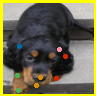

{'image': tensor([[[244, 244, 239,  ..., 133, 153, 169],
         [234, 229, 224,  ...,  96, 107, 108],
         [196, 205, 213,  ...,  95,  84,  86],
         ...,
         [132, 183, 111,  ..., 179, 184, 150],
         [141, 126, 123,  ..., 170, 170, 221],
         [133,  84, 166,  ..., 171, 161, 149]],

        [[205, 195, 186,  ..., 116, 135, 153],
         [195, 179, 169,  ...,  81,  92,  92],
         [156, 153, 157,  ...,  86,  73,  75],
         ...,
         [150, 198, 125,  ..., 201, 206, 171],
         [159, 142, 137,  ..., 194, 192, 236],
         [153, 102, 180,  ..., 195, 185, 173]],

        [[127, 110,  96,  ...,  76,  96, 114],
         [116,  93,  79,  ...,  47,  59,  62],
         [ 75,  65,  65,  ...,  57,  46,  49],
         ...,
         [ 91, 142,  72,  ..., 154, 160, 126],
         [ 97,  83,  82,  ..., 145, 146, 197],
         [ 91,  44, 126,  ..., 144, 134, 125]]], dtype=torch.uint8), 'img_bbox': [0.0, 0.0, 96.0, 96.0], 'joints': [[70.97528089887642, 90.294857

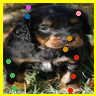

In [9]:
val_samples = []
for i, sample in enumerate(core.ValidationDataSetNoNormalization):
    if (i < image_index):
        val_samples.append(sample)
    
    if (i == image_index):
        break

keypoint_defs = get_keypoint_definitions('../data/annotations/keypoint_definitions.csv')

keypoint_colors = keypoint_defs['colors']

for sample in val_samples:
    sample_image_with_bbox = add_bbox_and_keypoints(sample['image'], sample['img_bbox'], sample['joints'], keypoint_colors)

    display(torchvision.transforms.functional.to_pil_image(sample_image_with_bbox))